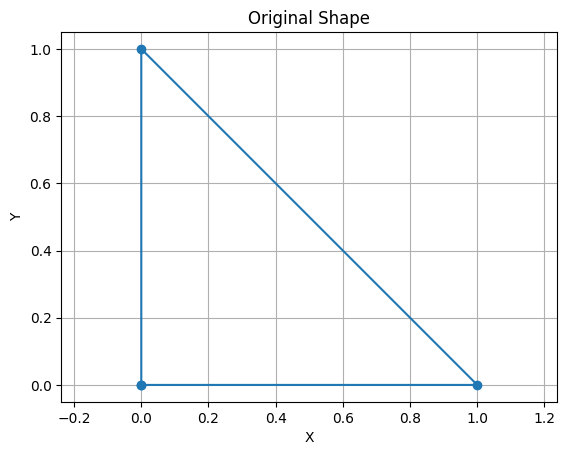

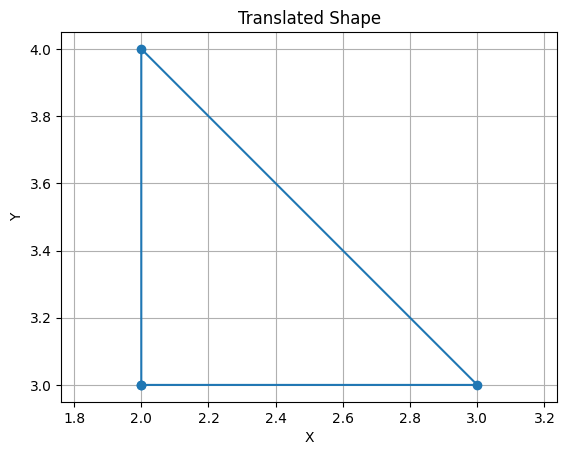

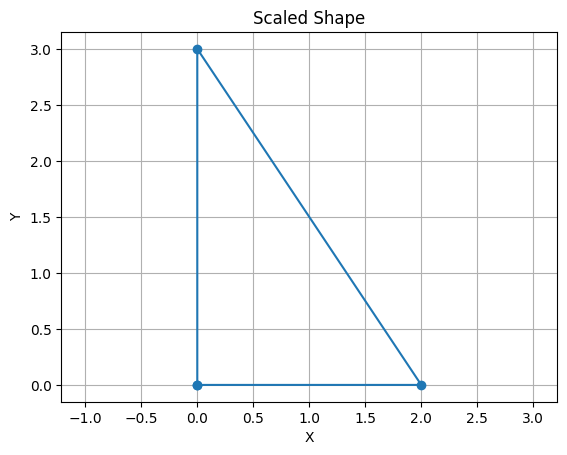

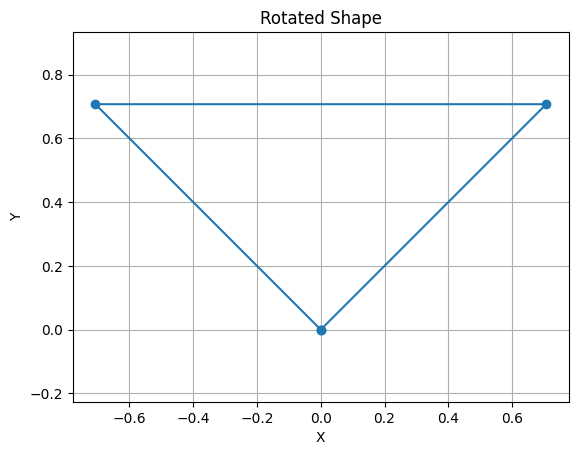

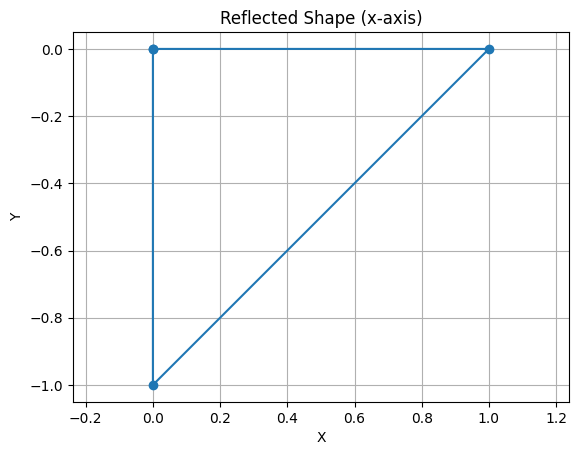

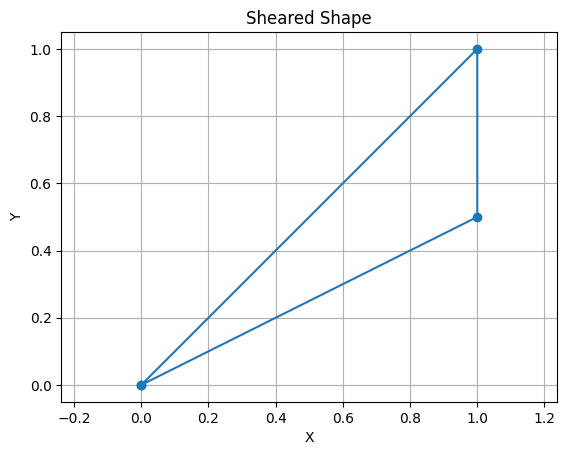

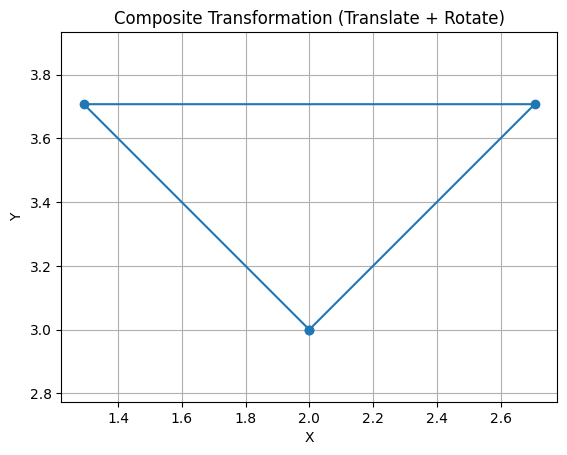

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(points, title="Shape"):
    points = np.append(points, [points[0]], axis=0)  # Close the shape
    plt.figure()
    plt.plot(points[:, 0], points[:, 1], '-o')
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.axis('equal')
    plt.show()

def translate(points, tx, ty):
    transformation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return apply_transformation(points, transformation_matrix)

def scale(points, sx, sy):
    transformation_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, transformation_matrix)

def rotate(points, angle_deg):
    angle_rad = np.radians(angle_deg)
    transformation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad), 0],
        [np.sin(angle_rad), np.cos(angle_rad), 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, transformation_matrix)

def reflect(points, axis):
    if axis == 'x':
        transformation_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        transformation_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        transformation_matrix = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'origin'")
    return apply_transformation(points, transformation_matrix)

def shear(points, shx, shy):
    transformation_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, transformation_matrix)

def composite_transformation(points, transformations):
    combined_matrix = np.eye(3)
    for matrix in transformations:
        combined_matrix = np.dot(combined_matrix, matrix)
    return apply_transformation(points, combined_matrix)

def apply_transformation(points, transformation_matrix):
    # Convert points to homogeneous coordinates
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed_points_h = np.dot(points_h, transformation_matrix.T)
    return transformed_points_h[:, :2]

# Example Usage
# Initial shape: a triangle
triangle = np.array([
    [0, 0],
    [1, 0],
    [0, 1]
])

plot_shape(triangle, "Original Shape")

# Translation
translated_triangle = translate(triangle, tx=2, ty=3)
plot_shape(translated_triangle, "Translated Shape")

# Scaling
scaled_triangle = scale(triangle, sx=2, sy=3)
plot_shape(scaled_triangle, "Scaled Shape")

# Rotation
rotated_triangle = rotate(triangle, angle_deg=45)
plot_shape(rotated_triangle, "Rotated Shape")

# Reflection
reflected_triangle = reflect(triangle, axis='x')
plot_shape(reflected_triangle, "Reflected Shape (x-axis)")

# Shearing
sheared_triangle = shear(triangle, shx=1, shy=0.5)
plot_shape(sheared_triangle, "Sheared Shape")

# Composite Transformation: Translate, then Rotate
composite_matrix = [
    np.array([
        [1, 0, 2],  # Translation
        [0, 1, 3],
        [0, 0, 1]
    ]),
    np.array([
        [np.cos(np.radians(45)), -np.sin(np.radians(45)), 0],  # Rotation
        [np.sin(np.radians(45)), np.cos(np.radians(45)), 0],
        [0, 0, 1]
    ])
]

composite_shape = composite_transformation(triangle, composite_matrix)
plot_shape(composite_shape, "Composite Transformation (Translate + Rotate)")


In [ ]:
import cv2
print(cv2.__version__)

4.10.0


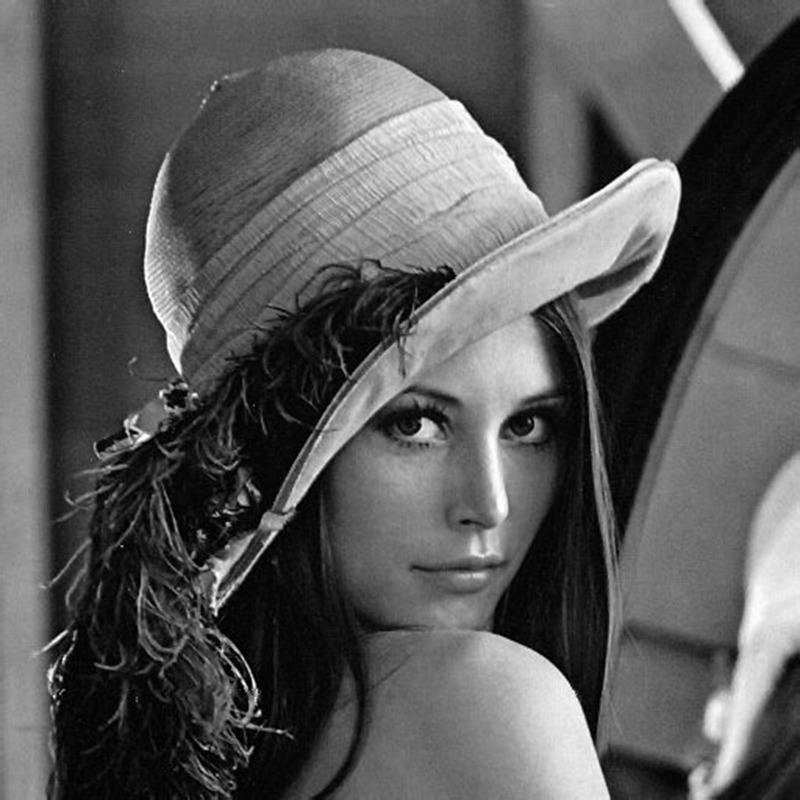

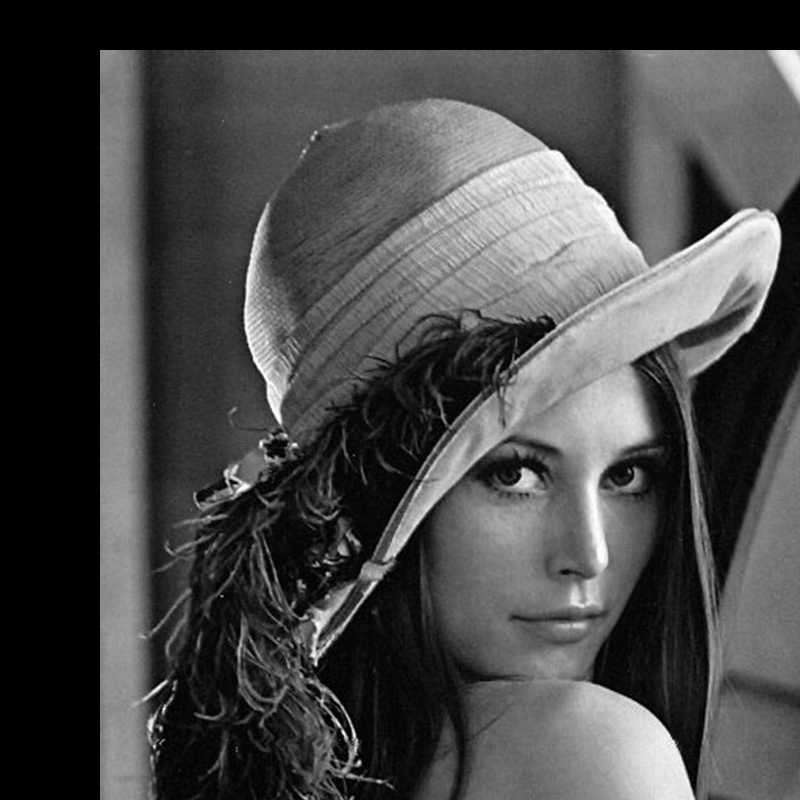

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/lba1_image_video.jpg')
height, width = image.shape[:2]
tx, ty = 100, 50
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

translated_image = cv2.warpAffine(image, translation_matrix, (width, height))
cv2_imshow(image)
cv2_imshow(translated_image)
cv2.imwrite('translated_image.jpg', translated_image)

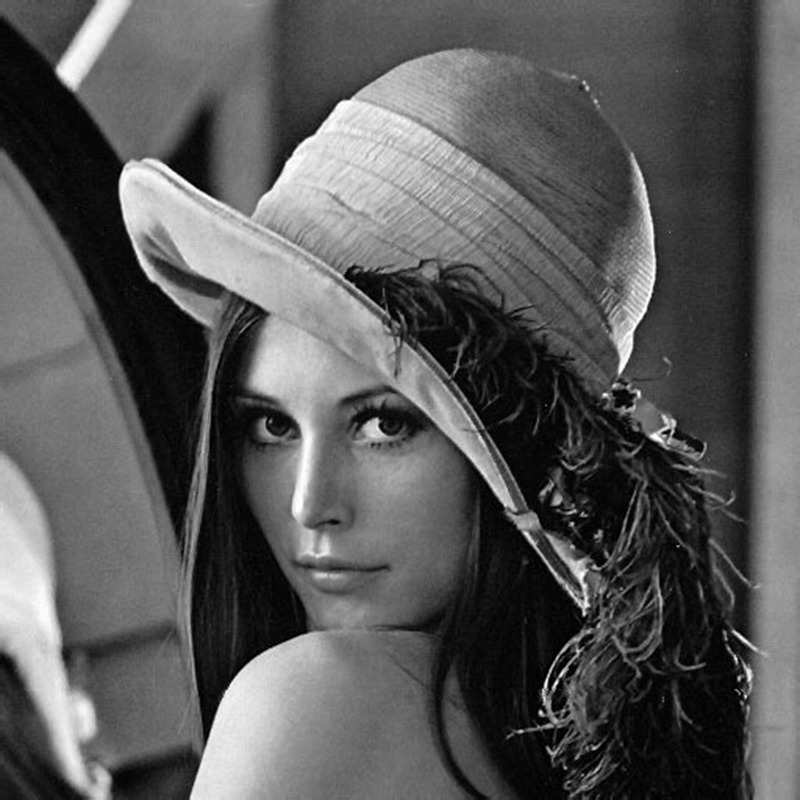

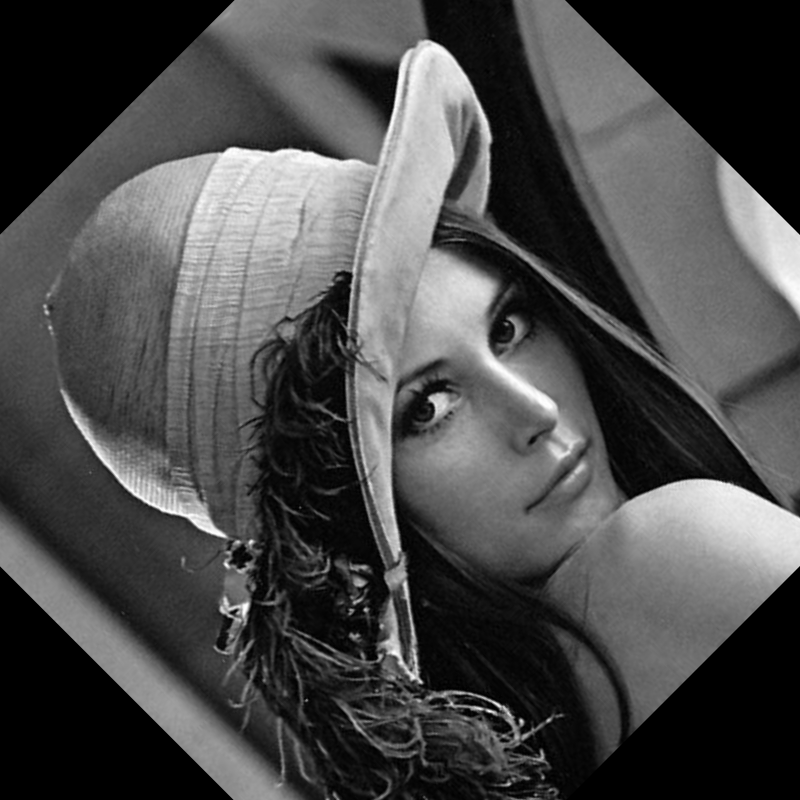

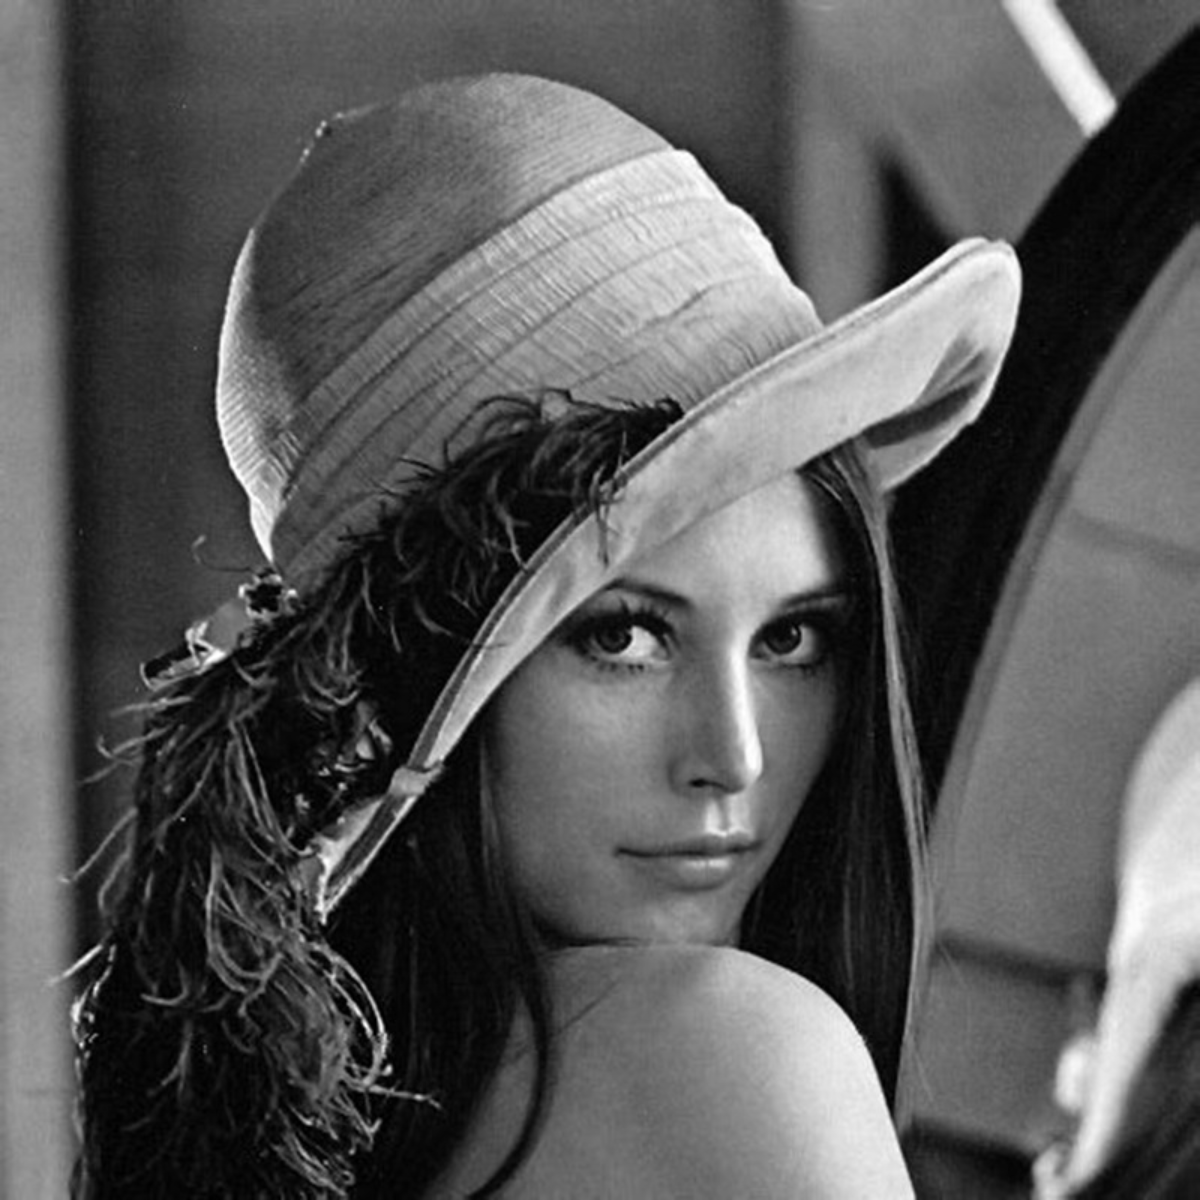

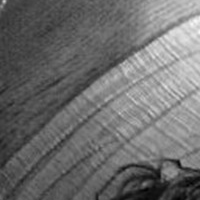

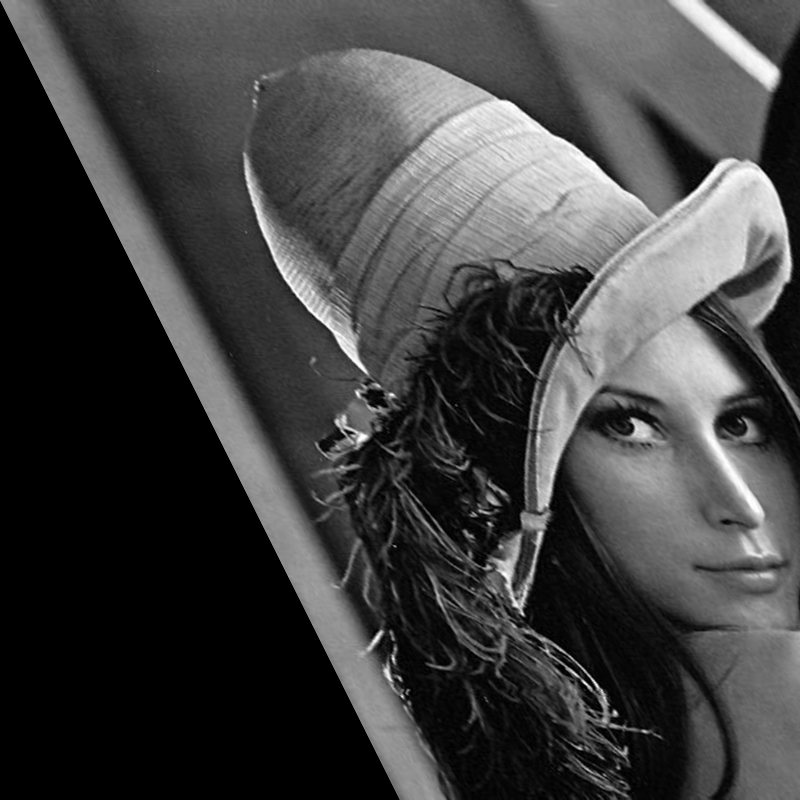

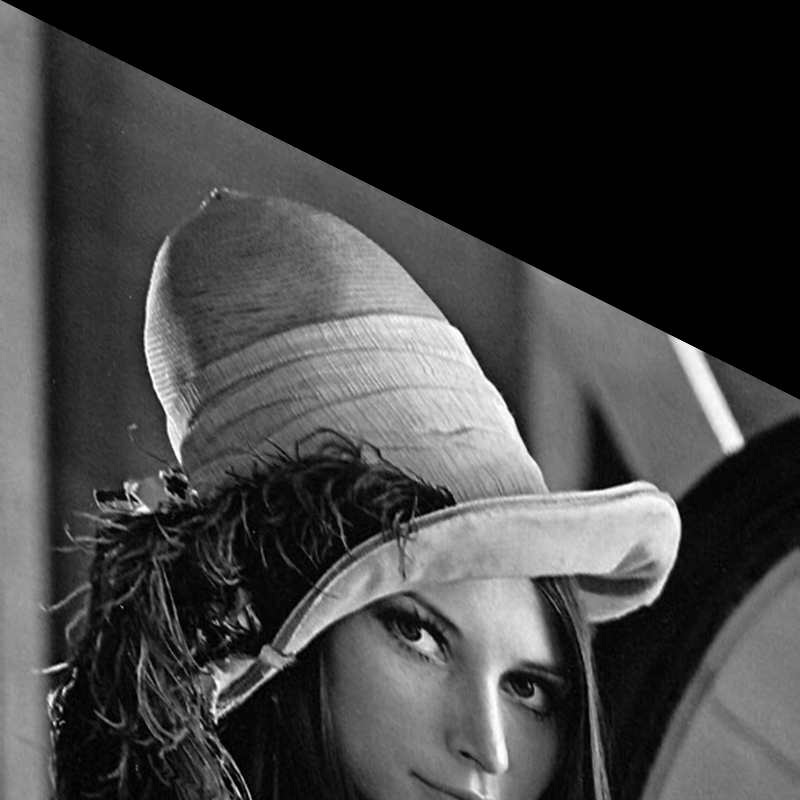

In [ ]:
#Reflection
reflected_image = cv2.flip(image, 1)
cv2_imshow(reflected_image)

#Rotate
center = (width / 2, height / 2)
rotation_matrix =cv2.getRotationMatrix2D(center, 45, 1)
rotated_image =cv2.warpAffine(image, rotation_matrix, (width, height))
cv2_imshow(rotated_image)

#Scale
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5,interpolation=cv2.INTER_LINEAR)
cv2_imshow(scaled_image)

#crop
crop_image=image[100:300, 200:400]
cv2_imshow(crop_image)

#shearing in x-axis
shear_matrix = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (width, height))
cv2_imshow(sheared_image)

#shearing in y-axis
shear_matrix = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (width, height))
cv2_imshow(sheared_image)

